# https://github.com/Aronbryant

# 1利用EN,Lasso，Ridge对IRIS数据集建立回归模型并比较

In [1]:
#以iris数据为例
#导入基本程序包
import pandas  as pd
import numpy  as np
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn import metrics
#导入IRIS数据集 
iris = load_iris() 
 #特征矩阵 
X=iris.data 
 #目标向量 
y=iris.target


In [2]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
from sklearn.cross_validation import train_test_split #导入数据划分包
#以20%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state =133)
elastic= linear_model.ElasticNet(alpha=0.1,l1_ratio=0.5)  # 设置lambda值,l1_ratio值 ，这里需要注意的是，ElasticNet最基本的参数是alpha、l1_ratio，alpha其正则化选项中的λ，l1_ratio则是对应α。这里的random_state就是为了保证程序每次运行都分割一样的训练集和测试集。
elastic.fit(X_train,y_train)  #使用训练数据进行参数求解
y_hat2 = elastic.predict(X_test)  #对测试集的预测
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat2)))  #计算RMSE

RMSE: 0.19670925882853948


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
ridge= linear_model.Ridge(alpha=0.1)  # 设置lambda值
ridge.fit(X_train,y_train)  #使用训练数据进行参数求解
y_hat = ridge.predict(X_test)  #对测试集的预测
from sklearn import metrics  #导入metrics评价模块
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))  #计算RMSE



RMSE: 0.18376398167079275


In [5]:
lasso= linear_model.Lasso(alpha=0.1)  # 设置lambda值
lasso.fit(X_train,y_train)  #使用训练数据进行参数求解
y_hat1 = lasso.predict(X_test)  #对测试集的预测
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))  #计算RMSE


RMSE: 0.2089491940216403


###  可以得到岭回归的RMSE: 0.18376398167079275；得到Lasso回归的RMSE: 0.2089491940216403，我们看到，在相同的lambda值下，ElasticNet回归的RMSE介于岭回归、lasso之间，即比Lasso回归的效果好，比岭回归的效果差。当然我们可以调整参数，会得到不同结果。

# 2仿真一组样本数据，利用EN进行分析

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

最优正则化参数 : 0.000335292414924956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


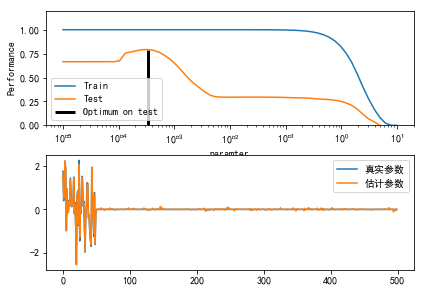

In [6]:
 import numpy as np  
 from sklearn import linear_model  
 
 
 # 生成一组样本数据，并手动分割数据集
 n_samples_train, n_samples_test, n_features = 75, 150, 500  
 np.random.seed(0)  
 coef = np.random.randn(n_features)  
 coef[50:] = 0.0  # 只让前五十个变量影响模型 
 X = np.random.randn(n_samples_train + n_samples_test, n_features)  
 y = np.dot(X, coef)  
 
 # 分离训练集和测试集  
 X_train, X_test = X[:n_samples_train], X[n_samples_train:]  
 y_train, y_test = y[:n_samples_train], y[n_samples_train:]  
 

 # 计算训练误差和测试误差
 alphas = np.logspace(-5, 1, 60)  
 en = linear_model.ElasticNet(l1_ratio=0.7)  
 train_errors = list()  
 test_errors = list()  
 for alpha in alphas:  
     en.set_params(alpha=alpha)  
     en.fit(X_train, y_train)  
     train_errors.append(en.score(X_train, y_train))  
     test_errors.append(en.score(X_test, y_test))  
 
 i_alpha_optim = np.argmax(test_errors)  
 alpha_optim = alphas[i_alpha_optim]  
 print("最优正则化参数 : %s" % alpha_optim)  
 
 # 在整个数据集上用正则化参数估计系数 
 en.set_params(alpha=alpha_optim)  
 coef_ = en.fit(X, y).coef_  
 

 # 画出结果图 
 
 import matplotlib.pyplot as plt  
    
 #正确显示中文   
 plt.rcParams['font.sans-serif'] = 'SimHei'
 plt.rcParams['axes.unicode_minus'] = False
 plt.subplot(2, 1, 1)  
 plt.semilogx(alphas, train_errors, label='Train')  
 plt.semilogx(alphas, test_errors, label='Test')  
 plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',  
         linewidth=3, label='Optimum on test')  
 plt.legend(loc='lower left')  
 plt.ylim([0, 1.2])  
 plt.xlabel('paramter')  
 plt.ylabel('Performance')  
 plt.rcParams['font.sans-serif'] = 'SimHei'
 plt.rcParams['axes.unicode_minus'] = False
 plt.subplot(2, 1, 2)  
 plt.plot(coef, label='真实参数')  
 plt.plot(coef_, label='估计参数')  
 plt.legend()  
 plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)  
 plt.show()  

In [7]:
pass